In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [3]:
from DomainPrediction.utils import helper
from DomainPrediction.utils.constants import *

In [7]:
root = '../..'
data_path = os.path.join(root, 'Data/round_2_exp/ll_guidance_ruggedness')

In [8]:
filename = os.path.join(data_path, 'likelihood_db.json')
if os.path.isfile(filename):
    with open(filename) as f:
        likelihood_db = json.load(f)


In [9]:
len(likelihood_db)

22782

In [10]:
filename = os.path.join(data_path, 'ruggedness_data_ll_guidance-ESM2.json')
with open(filename) as fin:
    ll_exp_data = json.load(fin)

In [11]:
ll_exp_data['M1']['M1R1']

{'n_mut': 1,
 'n_rep': 1,
 'peak_seq': 'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLPAPGADDLLRAAYEAPQGETEQLLAGIWAELLGVERVGRHDNFFELGGHSLLAVRLLSRLRQHGLELSMRDLFEAPVLAELATRVRPAQAVELPASRITPETTVLTPELLPLVELSQAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFN

In [12]:
rounds = []
rounds_peak_reached = []
for n_mut in ll_exp_data:
    rounds.append(len(ll_exp_data[n_mut]))
    count = 0
    for reps in ll_exp_data[n_mut]:
        if ll_exp_data[n_mut][reps]['peak_seq'] == ll_exp_data[n_mut][reps]['best_seq']:
            count += 1
    rounds_peak_reached.append(count)

rounds_peak_reached = np.array(rounds_peak_reached)
rounds = np.array(rounds)

Text(0.5, 0, 'Number of Mutations')

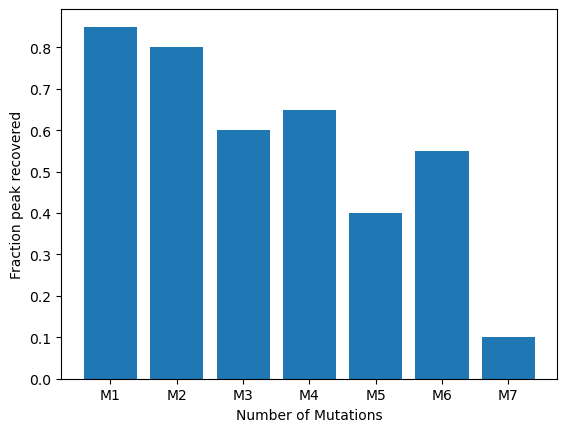

In [17]:
fig, ax  = plt.subplots(1, 1)
ax.bar(list(ll_exp_data.keys())[:-1], (rounds_peak_reached/rounds)[:-1])
ax.set_ylabel('Fraction peak recovered')
ax.set_xlabel('Number of Mutations')

In [18]:
rounds

array([20, 20, 20, 20, 20, 20, 20,  3])

In [19]:
rounds_peak_reached

array([17, 16, 12, 13,  8, 11,  2,  1])